In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from joblib import dump

# Load the training data
data = pd.read_csv("wind_power_gen_5years_training_data.csv")

# Separate features and target variable
features = ["AirTemp", "Pressure", "WindSpeed"]  # Adjust as needed
target = "PowerGen"

X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Create the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Now you can use the trained model to predict power generation on the validation data
validation_data = pd.read_csv("wind_power_gen_3months_validation_data.csv")
validation_predictions = model.predict(validation_data[features])

# Store the final trained model
model_filename = "/content/final_power_gen_model.joblib"
dump(model, model_filename)
print(f"Final trained model saved as '{model_filename}'")


Mean Squared Error: 0.09
R-squared: 1.00
Final trained model saved as '/content/final_power_gen_model.joblib'


In [4]:
import pandas as pd
import numpy as np

# Define ranges for features (adjust as needed)
temp_range = (10, 30) # Temperature range in Celsius
pressure_range = (980, 1030) # Pressure range in hPa
wind_speed_range = (2, 10) # Wind speed range in m/s

# Generate random sample data (modify number of samples as desired)
num_samples = 5
new_data = np.random.rand(num_samples, 3) * (np.array([pressure_range[1], temp_range[1], wind_speed_range[1]]) -
                                          np.array([pressure_range[0], temp_range[0], wind_speed_range[0]])) + np.array([pressure_range[0], temp_range[0], wind_speed_range[0]])

# Convert new_data to a DataFrame with column names
new_data_df = pd.DataFrame(new_data, columns=features)  # Replace 'features' with your actual feature names

# Combine existing data (if available) and sample data
if hasattr(data, 'data'):  # Check if existing_data is defined
    new_data_with_samples = pd.concat([data, new_data_df], ignore_index=True)
else:
    new_data_with_samples = new_data_df  # Use only sample data if existing_data is not available

# Make predictions
predictions = model.predict(new_data_with_samples[features])

# Combine predictions with new data
new_data_with_samples["Predicted PowerGen"] = predictions
print(new_data_with_samples)

# Create separate DataFrame for predictions (optional)
predicted_data = pd.DataFrame({"AirTemp": new_data_with_samples["AirTemp"],
                               "Pressure": new_data_with_samples["Pressure"],
                               "WindSpeed": new_data_with_samples["WindSpeed"],
                               "Predicted PowerGen": predictions})
print(predicted_data)


       AirTemp   Pressure  WindSpeed  Predicted PowerGen
0  1011.562667  19.663140   8.622876           27.063667
1   993.359227  21.508451   8.040060           22.121433
2  1014.740779  21.579803   3.063736            0.000000
3  1029.156274  16.551817   8.229638           24.170335
4   992.447652  18.291498   9.339096           34.575660
       AirTemp   Pressure  WindSpeed  Predicted PowerGen
0  1011.562667  19.663140   8.622876           27.063667
1   993.359227  21.508451   8.040060           22.121433
2  1014.740779  21.579803   3.063736            0.000000
3  1029.156274  16.551817   8.229638           24.170335
4   992.447652  18.291498   9.339096           34.575660


In [5]:
import pandas as pd
import numpy as np
from joblib import load

# Load the trained model and feature names
model = load("/content/final_power_gen_model.joblib")
features = ["AirTemp", "Pressure", "WindSpeed"]  # Adjust as needed

# Define ranges for features (adjust as needed)
temp_range = (10, 30)  # Temperature range in Celsius
pressure_range = (980, 1030)  # Pressure range in hPa
wind_speed_range = (2, 10)  # Wind speed range in m/s

# Function to get input for a single data point
def get_input():
    air_temp = float(input("Enter air temperature (Celsius): "))
    pressure = float(input("Enter pressure (hPa): "))
    wind_speed = float(input("Enter wind speed (m/s): "))
    return [air_temp, pressure, wind_speed]

# Function to make predictions for a single data point
def make_prediction(input_data):
    input_data = np.array(input_data).reshape(1, -1)  # Reshape to 2D array
    prediction = model.predict(input_data)
    return prediction

# Get input from the user
input_data = get_input()

# Check if the model is loaded
if model is not None:
    # Make prediction for the input data
    prediction = make_prediction(input_data)
    print("Predicted Power Generation (MW):", prediction)
else:
    print("Error: Model is not loaded.")


Enter air temperature (Celsius): 23
Enter pressure (hPa): 990
Enter wind speed (m/s): 4
Predicted Power Generation (MW): [1.3097013]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


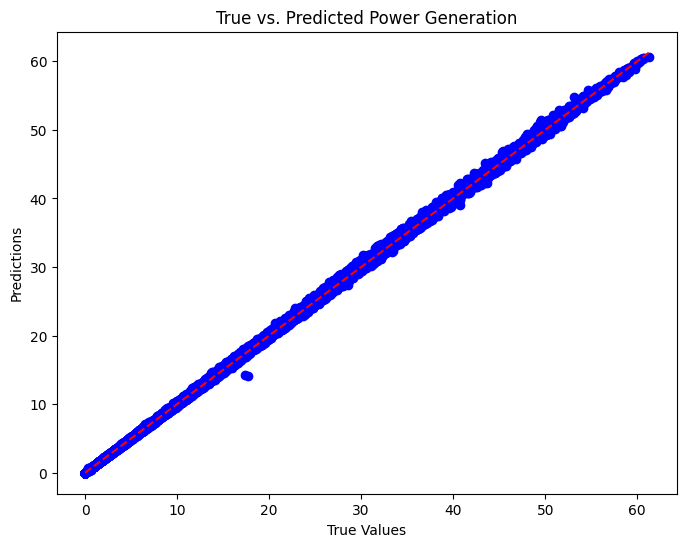

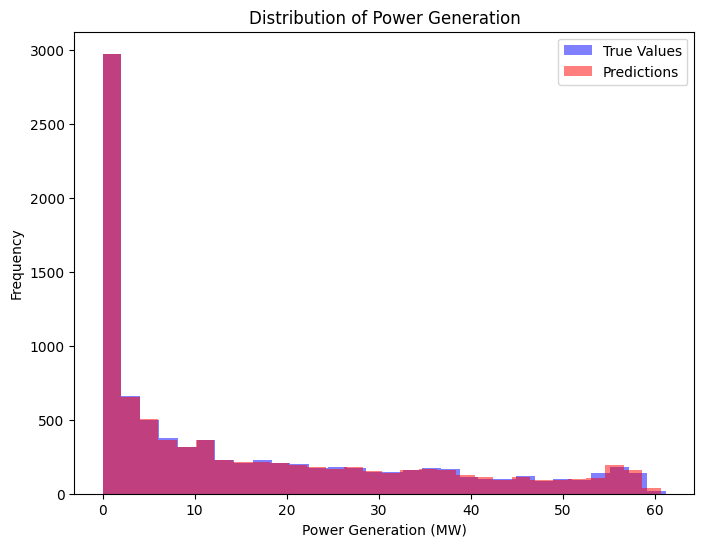

In [6]:
import matplotlib.pyplot as plt
# Plot predicted vs. true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Power Generation')
plt.show()

# Plot distribution of power generation
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=30, alpha=0.5, color='blue', label='True Values')
plt.hist(y_pred, bins=30, alpha=0.5, color='red', label='Predictions')
plt.xlabel('Power Generation (MW)')
plt.ylabel('Frequency')
plt.title('Distribution of Power Generation')
plt.legend()
plt.show()

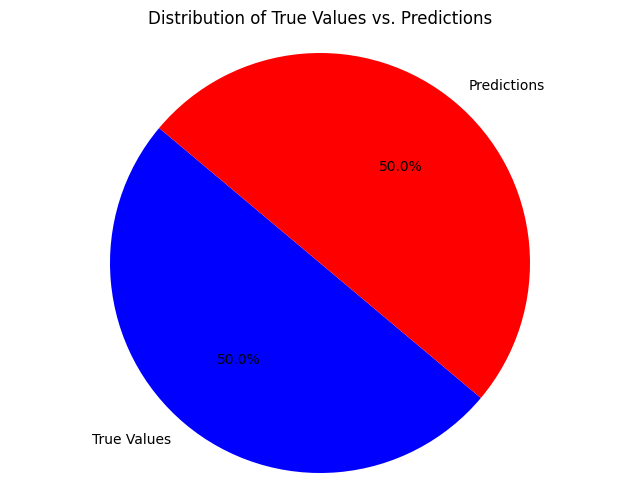

In [7]:
# Plot distribution of power generation
plt.figure(figsize=(8, 6))
labels = ['True Values', 'Predictions']
colors = ['blue', 'red']
values = [len(y_test), len(y_pred)]
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of True Values vs. Predictions')
plt.axis('equal')
plt.show()
